## Best bit parameters and concatenated file

 The purpose of the following notebook is to perform grid search to find the best two parameters namely,
 alpha and gamma that are to be properly tuned in Kernel Ridge Regression using Laplacian Kernel. In addition 
 we choose 10 percent (1 percent here ) of the whole randomly selected concatenated data and do 80/20 train/test 
 split. As usual we start by importing required modules. Try installing using pip (eg. pip install scikit-learn ) 
 if you don't have some or all of the following modules. Since most of the functions used here are used on other 
 notebooks herewith, I will not describe these here. We get a pdf file plotting train/test error and the best
 fit parameter. Here we can choose kernel = 'laplacian' or 'rbf', etc.,


In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
#
import tarfile
import re
import sys
import random 
import operator 
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

/home/santosh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/santosh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=

In [2]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true-y_pred))

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))

def string_number_separator(string):
    import re
    temp = re.compile("([a-zA-Z]+)([0-9]+)")
    res = temp.match(string).groups()
    return res

def list_of_atoms_and_numbers(string):
    atoms=[]
    atoms_number=[]
    str1=''
    while len(str1)<len(string):
        string1=str(string)[len(str1):]
        x,y=string_number_separator(string1)
        str1=str1+str(x)+str(y)
        atoms.append(str(x))
        atoms_number.append(int(y))
    return atoms, atoms_number

def input_column_creater(atom_list,prop):
    orbs=['1s','2s','2p','3s','3p','3d','4s','4p','4d','5s','5p','5d','6s','6p']
    orbs_generated=[]
    for elements in atom_list:
        for i in range (len(orbs)):
            new_str=str(orbs[i]+str(elements))
            orbs_generated.append(new_str)
    for j in range (len(prop)):
        orbs_generated.append(str(prop[j]))
    return orbs_generated

def train_model(x_test, y_test, x_train, y_train, nfold, nthread, in_alpha=np.logspace(-15, 5, 21, base=2), in_gamma=np.logspace(-15, 3, 19, base=2), kernel=None, rseed=None):

    if rseed:
        random.seed(rseed)
        np.random.seed(rseed)

    neg_root_mean_squared_error = make_scorer(root_mean_squared_error, greater_is_better=False)

    clf = GridSearchCV(KernelRidge(kernel=kernel), cv=nfold, n_jobs=nthread, verbose=1, scoring=neg_root_mean_squared_error, param_grid={"alpha":in_alpha, "gamma": in_gamma})

    clf.fit(x_train, y_train)

    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)

    return clf, clf.best_params_, y_train, y_test, y_train_pred, y_test_pred

def scatter_comp(x1, y1, x2, y2, error_unit, xlabel, ylabel, plot_name):

    import os, sys
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    from sklearn.metrics import r2_score

    axis_width = 2
    mpl.rcParams['mathtext.default'] = 'regular'
    mpl.rcParams['axes.linewidth'] = axis_width
    mpl.rcParams['axes.unicode_minus']=False

    fontsize = 24
    alpha = 0.2
    lw45 = 1.5
    axis_width=1.5
    figsize = (9.2,7)
    label_font = 24
    tick_font = 20
    leg_font = 20
    tick_len = 6
    test_marker = 'o'  #test_mark = '^'
    train_marker = 'o'
    train_color = 'gray'
    test_color = 'blue' #'red'
    pt_alpha = 0.3
    pt_lw = 0
    pt_s = 80
    htp=0.1
    diag_color = 'black'
    diag_lw = axis_width
    diag_ls = '-'
    text_font = 20
    axis_width = 2
    leg_fancy = False
    leg_frame = True
    leg_alpha = 1
    leg_loc = 'upper right'
    htp = 0.2
    leg_color = 'white'
    leg_edge_color = 'black'
    leg_shadow = False
    leg_lw = axis_width
    s = 150
    pt_lw = 0
    decision_lw = axis_width
    decision_ls = '--'
    decision_color = 'black'
    markersize = 80
    alpha = 0.6
    lw45 = 1.5
    axis_width=1.5

    train_err = mae(y1, x1)
    test_err = mae(y2, x2)
    print(("MAE TRAIN ERROR", train_err))
    print(("MAE TEST ERROR", test_err))

    fig = plt.figure(figsize=figsize)    
    plt.scatter(x1, y1, color=train_color, marker=train_marker, s=markersize, alpha=alpha, lw=0)
    plt.scatter(x2, y2, color=test_color, marker=test_marker, s=markersize, alpha=alpha, lw=0)
    plt.legend(['train', 'test'], fontsize=fontsize-4, frameon=False, loc='lower right')

    xmax = np.max(x1)
    xmin = np.min(x1)
    x45 = np.linspace(xmax*.98, xmin*1.02, num=100)
    y45 = x45
    plt.plot(x45, y45, color='black', lw=lw45, label='__nolegend__')

    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize)

    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    axes = plt.gca()
    axes.set_title(axes.get_title()) #* 2)
    axes.set_xlabel(axes.get_xlabel(), size=fontsize) #* 0.5) # fontname="Times New Roman")
    axes.set_ylabel(axes.get_ylabel(), size=fontsize)

    fig_label = "RMSE"

    plt.tick_params('both', length = 6, width = axis_width, which = 'major',right=True,top=True)

    fig.savefig(plot_name, dpi=600, bbox_inches='tight')
    plt.show()
    return train_err,test_err

def modified_pettifor(in_atom):

    mod_scale = {
                "He": 1,
                "Ne": 2,
                "Ar": 3,
                "Kr": 4,
                "Xe": 5,
                "Rn": 6,
                "Fr": 7,
                "Cs": 8,
                "Rb": 9,
                "K": 10,
                "Na": 11,
                "Li": 12,
                "Ra": 13,
                "Ba": 14,
                "Sr": 15,
                "Ca": 16,
                "Eu": 17,
                "Yb": 18,
                "Lu": 19,
                "Tm": 20,
                "Y": 21,
                "Er": 22,
                "Ho": 23,
                "Dy": 24,
                "Tb": 25,
                "Gd": 26,
                "Sm": 27,
                "Pm": 28,
                "Nd": 29,
                "Pr": 30,
                "Ce": 31,
                "La": 32,
                "Ac": 33,
                "Th": 34,
                "Pa": 35,
                "U": 36,
                "Np": 37,
                "Pu": 38,
                "Am": 39,
                "Cm": 40,
                "Bk": 41,
                "Cf": 42,
                "Es": 43,
                "Fm": 44,
                "Md": 45,
                "No": 46,
                "Lr": 47,
                "Sc": 48,
                "Zr": 49,
                "Hf": 50,
                "Ti": 51,
                "Ta": 52,
                "Nb": 53,
                "V": 54,
                "Cr": 55,
                "Mo": 56,
                "W": 57,
                "Re": 58,
                "Tc": 59,
                "Os": 60,
                "Ru": 61,
                "Ir": 62,
                "Rh": 63,
                "Pt": 64,
                "Pd": 65,
                "Au": 66,
                "Ag": 67,
                "Cu": 68,
                "Ni": 69,
                "Co": 70,
                "Fe": 71,
                "Mn": 72,
                "Mg": 73,
                "Zn": 74,
                "Cd": 75,
                "Hg": 76,
                "Be": 77,
                "Al": 78,
                "Ga": 79,
                "In": 80,
                "Tl": 81,
                "Pb": 82,
                "Sn": 83,
                "Ge": 84,
                "Si": 85,
                "B": 86,
                "C": 87,
                "N": 88,
                "P": 89,
                "As": 90,
                "Sb": 91,
                "Bi": 92,
                "Po": 93,
                "Te": 94,
                "Se": 95,
                "S": 96,
                "O": 97,
                "At": 98,
                "I": 99,
                "Br": 100,
                "Cl": 101,
                "F": 102,
                "H": 103
            }

    return mod_scale[in_atom]/float(max(mod_scale.values()))

def compound_pettifor(compound):
    cpd=compound.split('-')[0]
    in_atom,num_atom=list_of_atoms_and_numbers(cpd)
    if len(in_atom)==1:
        norm_pettifor=modified_pettifor(in_atom[0])
        return norm_pettifor
    else:
        norm_pettifor=0
        for i in range (len(in_atom)):
            tot=sum(num_atom)
            norm_pettifor+=(num_atom[i]/tot)*modified_pettifor(in_atom[i])
        return norm_pettifor
                

In [3]:
## use ker='rbf' if you want to use rbf kernel here. 
def best_fit(csv_path,ker='laplacian'):
    df = pd.read_csv(csv_path)
    tmp_feats =['pet','ACT_PBE','PD_PBE','bg_PBE','bg_HSE']
    keep_cols = tmp_feats
    x_data_ini=df[keep_cols].to_numpy()
    number_of_rows=x_data_ini.shape[0]
    #random_indices=x_data_ini[np.random.randint(x_data_ini.shape[0], size=int(number_of_rows/100)), :] # 1 percent 
    #x_data =random_indices[:, :-1]
    #y_data =random_indices[:, -1]
    
    x_data=x_data_ini[:, :-1]
    y_data=x_data_ini[:,-1]
    
    # print(keep_cols)
    # keep_cols = columns
    #y_feat = 'eigshift(eV)'
    #y_feat='EF_HSE'
    #x_data = df[keep_cols].to_numpy()
    #y_data = df[y_feat].to_numpy()

    print(np.shape(x_data)) #x_data)
    print(np.shape(y_data)) #y_data)


    test_size = 0.20 
    nfold = 5
    nthread = 2
    #ker = 'laplacian'
    #ker = 'rbf'

    number = random.randint(1, 1000)
    print("random seed", number)
    rseed = random.seed(number)

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_size, shuffle=True)

    alphas = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0] #np.logspace(-15, 5, 21, base=2) #  # #
    gammas = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0] #np.linspace(0.001,0.1, 20) #np.logspace(-15, 5, 21, base=2) 

    res_dict = { idx: {'pred_test': [], 'pred_train': [], "best_params":{'alpha': 0, 'gamma': 0}} for idx in range(len(gammas)) }
    all_data_mae = []
    for it, g in enumerate(gammas):
        clf, clf.best_params_, y_train, y_test, y_train_pred, y_test_pred = train_model(x_test, y_test, x_train, y_train, nfold, nthread, in_alpha=alphas, in_gamma=[g], kernel=ker, rseed=rseed)
        print(clf.best_params_)
        print(np.shape(y_train_pred), np.shape(y_test_pred))
        res_dict[it]['pred_train'].append( y_train_pred )
        res_dict[it]['pred_test'].append( y_test_pred )
        res_dict[it]['best_params']['alpha'] = clf.best_params_['alpha']
        res_dict[it]['best_params']['gamma'] = clf.best_params_['gamma']
        print(it, "RMSE", root_mean_squared_error(y_test, y_test_pred))
        print(it, "MAE", np.mean(abs(y_test - y_test_pred)))
        diff = abs(y_test - y_test_pred)
        all_data_mae.append(np.mean(diff))

    min_index, min_value = min(enumerate(all_data_mae), key=operator.itemgetter(1))

    tmp_figname =str(csv_path.split('/')[-1])[:-4]+'_'.join(["train_nsamples="+str(len(y_train)), "ker="+ker, "MAE="+str(min_value)])
    figname = tmp_figname+".pdf"
    xlabel = r"HSE band gap (eV)"
    ylabel = r"ML band gap (eV)"
    error_unit = "eV"

    print('best parameters', "gamma:", res_dict[min_index]['best_params']['gamma'], "alpha:", res_dict[min_index]['best_params']['alpha'])
    train_err,test_err=scatter_comp(y_train, res_dict[min_index]['pred_train'],  y_test, res_dict[min_index]['pred_test'], error_unit, xlabel, ylabel, figname)
    return train_err,test_err,res_dict[min_index]['best_params']['gamma'],res_dict[min_index]['best_params']['alpha']

(88, 4)
(88,)
random seed 793
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/santosh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/home/santosh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecate

{'alpha': 0.0001, 'gamma': 0.0001}
(70,) (18,)
0 RMSE 0.4607244480937025
0 MAE 0.3938115803852227
Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'alpha': 0.001, 'gamma': 0.001}
(70,) (18,)
1 RMSE 0.46065660158261157
1 MAE 0.39365589498739406
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/santosh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/home/santosh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecate

{'alpha': 0.01, 'gamma': 0.01}
(70,) (18,)
2 RMSE 0.46002494039387876
2 MAE 0.39215797195628777
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    0.2s finished
/home/santosh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:821: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/santosh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` 

{'alpha': 0.1, 'gamma': 0.1}
(70,) (18,)
3 RMSE 0.4573793812760045
3 MAE 0.3842528240681999
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    0.2s finished
/home/santosh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:821: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/santosh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` 

{'alpha': 0.01, 'gamma': 1.0}
(70,) (18,)
4 RMSE 0.5869921860790753
4 MAE 0.5053665325817893
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    0.3s finished
/home/santosh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:821: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/santosh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` 

{'alpha': 1e-07, 'gamma': 10.0}
(70,) (18,)
5 RMSE 3.5973789656313855
5 MAE 3.105335316650119
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    0.3s finished
/home/santosh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:821: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/santosh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` 

{'alpha': 1e-07, 'gamma': 100.0}
(70,) (18,)
6 RMSE 4.004229534472666
6 MAE 3.6538261977476103
best parameters gamma: 0.1 alpha: 0.1
('MAE TRAIN ERROR', 0.40162830277796524)
('MAE TEST ERROR', 0.3842528240681999)


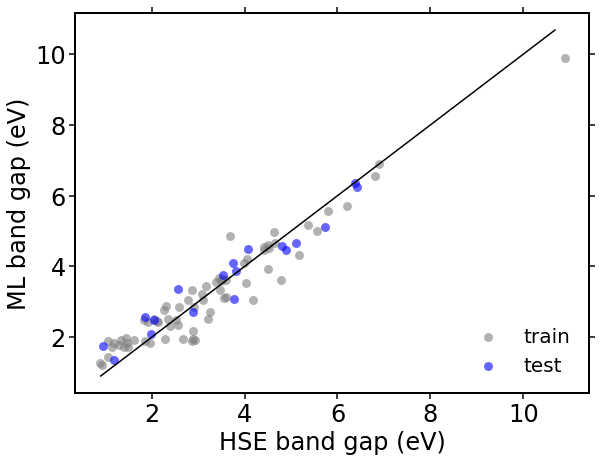

0.40162830277796524 0.3842528240681999 0.1 0.1


In [4]:
cwd=os.getcwd()
#atom_path=os.path.join(cwd,'atom_sum_compound_csv_files/')
#concat_path=os.path.join(cwd,'special_concatenations_compounds_atom_sum/')
#listdir_cwd=os.listdir(cwd)
#print(listdir)
#check=['atom_sum_compound_csv_files','special_concatenations_compounds_atom_sum']

#print(list_atom_files)
name='properties.csv'
train_err,test_err,gamma,alpha=best_fit(str(name))
list_values=[str(name)[:-4],train_err,test_err,gamma,alpha]
#print(cwd)
#print(atom_path)
#path=cwd+'/Ag2O1.csv'
#train_err,test_err,gamma,alpha=best_fit(path)
#print('At last')
print(train_err,test_err,gamma,alpha)
